# [프로젝트] P01 학생 신체데이터 분석
---
이름: 김태산

학과: 자동차공학과

학번: 20143211

---

## 프로젝트 목표: 우리나라 학생들의 신체데이터를 다양한 방법으로 분석하기

### Colab에서 구글드라이브 연결하기

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Task 1. csv 파일을 다운로드 받고 pandas를 이용하여 불러오기
 - Task 1-1. 데이터 불러오기
   - pd.read_csv로 파라미터 encoding 없이 신체 데이터를 불러오기를 시도하였을 때 다음과 같은 오류가 발생하였다.
   
   >  ` 'utf-8' codec can't decode byte 0xc3 in position 0: invalid continuation byte`

   - 이는 맥과 윈도우의 한글 인코딩 방식 차이 때문에 발생하는 오류로, encoding='cp949'을 입력하여 윈도우의 인코딩 방식으로 데이터를 불러오면 오류를 해결할 수 있다.
   - 출력 결과에서 학생들의 신체데이터를 확인할 수 있다.

In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [8]:
# df = pd.read_csv("./p01_input.csv", encoding='cp949')
df = pd.read_csv("/content/gdrive/My Drive/datasets/Seoul_student_medical/p01_input.csv", encoding='cp949')
df

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,1,1,남,2015-05-12,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,1,1,남,2015-04-22,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,1,1,남,2015-04-21,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,1,1,남,2015-04-21,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,1,1,남,2015-04-23,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,Ac343남30106,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,남여공학,3,1,남,2015-04-20,176.1,50.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9682,Ac343남30107,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,남여공학,3,1,남,2015-04-20,174.1,88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9683,Ac343남30108,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,남여공학,3,1,남,2015-04-20,169.5,63.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9684,Ac343여30101,23.325794,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,남여공학,3,1,여,2015-04-20,159.2,52.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Task 1-2. 데이터 중에서 키와 몸무게 데이터만 골라내기
 - 필요한 열의 이름인 '키'와 '몸무게'를 입력하여 데이터를 골라낸다.
 - 출력 결과를 보면, 기존의 데이터프레임에서 키와 몸무게 데이터만 입력된 것을 알 수 있다.

In [9]:
df = df[['키', '몸무게']]
df

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5
...,...,...
9681,176.1,50.4
9682,174.1,88.8
9683,169.5,63.2
9684,159.2,52.9


### Task 2. 학생들의 평균 키와 평균 몸무게 구하기
 - pandas의 mean 메서드를 이용하여 학생들의 평균 키와 평균 몸무게를 구한다.
 - mean 메서드에서 axis=0로 지정하면 각각의 열의 평균을, axis=1로 지정하면 각각의 행의 평균을 구할 수 있다.

In [10]:
mean = df.mean(axis=0)
print(f"평균 키: {mean[0]:.1f}cm\n평균 몸무게: {mean[1]:.1f}kg")

평균 키: 154.6cm
평균 몸무게: 50.2kg


### Task 3: 키와 몸무게 사이의 상관관계(Pearson Correlation Coefficient) 구하기
 - 먼저 Pearson Correlation Coefficient를 구하기 위한 함수를 구현한다.

In [11]:
def PearsonCorr(v1, v2):
  v1_c = v1 - v1.mean() # 각 벡터에 평균을 빼서 상관관계를 구했을 때 상관성이 낮을 경우 음수가 나오도록 한다.
  v2_c = v2 - v2.mean()
  
  vsize = np.sqrt((v1_c ** 2).sum() * (v2_c ** 2).sum()) # Pearson Correlation Coefficient의 분모에 들어갈 변수
  if vsize == 0: # 분모가 0이 되면 계산 불가
    return 0
  return (v1_c * v2_c).sum() / vsize

- PearsonCorr 함수를 이용하여 키와 몸무게 사이의 상관관계를 구하면 아래와 같다.

In [12]:
height = df['키']
weight = df['몸무게']
pearson = PearsonCorr(height, weight)
print(f"Pearson correlation coefficient between height and weight: {pearson:.6f}")

Pearson correlation coefficient between height and weight: 0.848975


### Task 4. Linear Regression을 사용하여 키와 몸무게 사이의 선형관계를 찾기(= 직선의 방정식 구하기: y=wx + b에서 w와 b값 구하기)
- 선형관계를 찾기 전에 먼저 데이터에 대해 살펴보기 위해 info 메서드를 사용한다.
- 출력 결과를 보면, 데이터프레임의 열 길이는 9686인 것을 알 수 있다.
- 또한 '키' 열에서 결측값이 아닌(non-null) 데이터가 9686개이고, '몸무게' 열에서 결측값이 아닌 데이터가 9682개이므로 몸무게 데이터에 4개의 결측값이 있다는 것을 알 수 있다.
- 따라서 Linear Regression을 사용하기 전에 결측값을 포함하는 샘플을 삭제하여 데이터에 결측값이 존재하지 않도록 한다.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   키       9686 non-null   float64
 1   몸무게     9682 non-null   float64
dtypes: float64(2)
memory usage: 151.5 KB


- Pandas의 dropna 메서드를 이용하면 결측값이 존재하는 샘플을 삭제할 수 있다.
- axis 파라미터를 0으로 지정할 경우 행 단위로, 1로 지정할 경우 열 단위로 결측값이 존재하는 위치의 데이터를 삭제할 수 있다.
- how는 데이터를 삭제하는 조건을 지정하는 파라미터로, how='any'이면 결측값이 행이나 열에 하나라도 존재할 경우 데이터를 삭제하고, how='all'이면 행이나 열의 전체 데이터가 결측값일 때에만 데이터를 삭제한다.
- how의 디폴트값은 'any'이다.
- 결측값을 삭제한 후 info 메서드 출력 결과를 보면, 몸무게 데이터가 결측값인 샘플이 삭제되어 키 데이터와 몸무게 데이터의 갯수가 9682개로 같아진 것을 알 수 있다.

In [14]:
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9682 entries, 0 to 9685
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   키       9682 non-null   float64
 1   몸무게     9682 non-null   float64
dtypes: float64(2)
memory usage: 226.9 KB


- 데이터 전처리 전 학습
 - 아래는 키와 몸무게 데이터를 전처리하지 않고 선형회귀 모델을 학습시키는 코드이다.
 - 위에서 키와 몸무게 데이터를 출력한 결과를 보면, 데이터의 단위는 무시하고 데이터의 값만 보았을 때 키 데이터의 자릿수가 몸무게 데이터의 자릿수보다 한자리 이상 큰 것을 알 수 있다.
 - 따라서 몸무게 데이터가 약간만 변화해도 키 데이터가 민감하게 변할 수 있고, 이는 선형회귀 모델의 학습을 지연시킬 수 있다는 것을 의미한다.
 - 아래의 코드는 이를 확인하는 코드로, 학습률을 매우 작게 설정하고 학습을 많이 반복하여 epoch가 1,000,000 정도 되어야 출력 결과 그래프와 같이 데이터를 잘 설명하도록 학습된 선형회귀 모델을 구할 수 있었다.

epoch: 0, cost: 80133.757764, w: 2.143213, b: 0.239084
epoch: 250000, cost: 130.437468, w: 0.444061, b: -17.664384
epoch: 500000, cost: 111.383723, w: 0.533499, b: -31.654945
epoch: 750000, cost: 99.733377, w: 0.603435, b: -42.594870
epoch: 1000000, cost: 92.609812, w: 0.658121, b: -51.149350


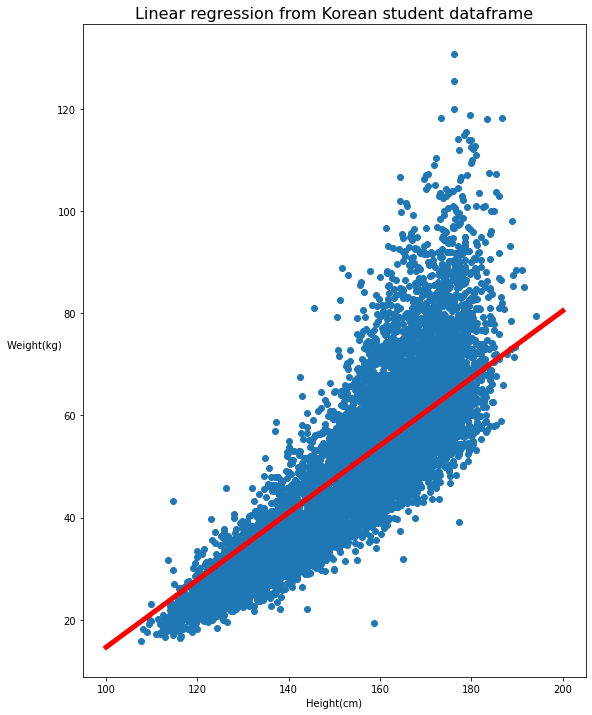

In [ ]:
x_train = torch.tensor(np.array(df['키'])).reshape(-1, 1)
y_train = torch.tensor(np.array(df['몸무게'])).reshape(-1, 1)
w = torch.randn(1, dtype=torch.double).reshape(-1, 1)
b = torch.randn(1, dtype=torch.double).reshape(-1, 1)

lr = 0.0000413
for epoch in range(1000001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(x_train, w.T) + b
  cost = torch.mean((hypothesis - y_train) ** 2)
  
  cost.backward()

  with torch.no_grad():
    w = w - lr * w.grad
    b = b - lr * b.grad
  
  if epoch % 250000 == 0:
    print(f"epoch: {epoch}, cost: {cost.item():.6f}, w: {w.item():.6f}, b: {b.item():.6f}")

x_plot = torch.linspace(100, 200, 10, dtype=torch.double).unsqueeze(1)
y_plot = (torch.mm(x_plot, w.T) + b).detach()

plt.figure(figsize=(9,12))
plt.plot(x_plot, y_plot, c='red', linewidth=5)
plt.scatter(x_train, y_train)

plt.title("Linear regression from Korean student dataframe", fontsize=16)
plt.xlabel("Height(cm)")
plt.ylabel("Weight(kg)            ", rotation=0)
plt.show()

- 데이터 전처리 후 학습
 - 위와 같이 너무 많이 학습을 반복하여 시간이 오래 걸리는 문제를 해결하기 위해서는 데이터를 전처리하면 된다.
 - 아래는 데이터를 전처리하는 코드이다.
 - 먼저 데이터프레임에서 키와 몸무게 데이터를 불러와 텐서로 학습 데이터를 만든다.
 - 학습 데이터를 정규화하기 위해서 표준편차(x_train_std, y_train_std)를 구한다.
 - 마지막으로 학습 데이터에서 평균을 빼고 표준편차를 나누어 학습 데이터를 정규화한다.
 - 따라서 정규화된 학습 데이터는 평균이 0이고 표준편차가 1인 데이터(x_train_normal, y_train_normal)로 정규화된다.
 - 데이터를 정규화하면 키와 몸무게 데이터의 단위가 같아지므로, 이를 이용하여 선형회귀 모델을 학습시키면 하나의 데이터가 민감하게 변화하여 학습이 더디게 진행되는 문제를 해결할 수 있다.

In [15]:
x_train = torch.tensor(np.array(df['키'])).reshape(-1, 1)
y_train = torch.tensor(np.array(df['몸무게'])).reshape(-1, 1)

x_train_std = (torch.mean((x_train - x_train.mean()) ** 2)) ** 0.5
y_train_std = (torch.mean((y_train - y_train.mean()) ** 2)) ** 0.5

x_train_normal = (x_train - x_train.mean()) / x_train_std
y_train_normal = (y_train - y_train.mean()) / y_train_std

- Task 4-1. 가설, 비용 설정하기
 - 프로젝트에서 선형회귀 모델을 가정하였으므로 y = wx + b의 형태로 가설을 정의한다.
 - 입력되는 데이터의 차원이 1차원이므로 w와 b도 1차원의 난수로 초기화하였다.
 - 선형회귀 모델의 경우 비용으로 MSE를 주로 사용하므로 이번 프로젝트에서도 MSE를 비용함수로 사용한다.
- Task 4-2. 경사하강법으로 비용을 최소로 만들도록 학습하기(torch.optim 사용하지 말고 직접 구현해보기)
 - cost.backward()를 통해 그레디언트를 계산한 후 with torch.no_grad(): 문에서 경사하강법을 사용하여 가중치를 갱신한다.
 - 학습 결과를 보면 epoch가 10,000이 되기 전에 이미 cost이 최소가 되는 것을 알 수 있다.
 - 이를 통해 데이터를 전처리하기 전보다 100배 이상 적게 학습을 반복하여 좋은 결과를 출력할 수 있음을 알 수 있다.

In [32]:
w = torch.randn(1, dtype=torch.double).reshape(-1, 1)
b = torch.randn(1, dtype=torch.double).reshape(-1, 1)

lr = 0.001
w_plot = [] # 일정 간격의 epoch마다 w와 b를 저장하기 위한 리스트
b_plot = []

prev_cost = torch.tensor(float("Inf"))

for epoch in range(10001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(x_train_normal, w) + b        # 가설 설정
  cost = torch.mean((hypothesis - y_train_normal) ** 2) # 비용 설정
  
  if prev_cost > cost:
    prev_cost = cost
  else:
    print(f"epoch: {epoch - 1}, minimum_cost: {prev_cost.item()}, w: {w.item():.6f}, b: {b.item()}")
    w_plot.append(w)
    b_plot.append(b)   
    break
  
  cost.backward()

  with torch.no_grad(): # 경사하강법 적용
    w = w - lr * w.grad
    b = b - lr * b.grad
  
  if epoch % 500 == 0:
    print(f"epoch: {epoch}, cost: {cost.item()}, w: {w.item():.6f}, b: {b.item()}")
    w_plot.append(w)
    b_plot.append(b)    

epoch: 0, cost: 2.6490687028977504, w: -0.607179, b: -0.4898308043869679
epoch: 500, cost: 0.5992757444843524, w: 0.313841, b: -0.18001833358794594
epoch: 1000, cost: 0.32242143744167195, w: 0.652327, b: -0.06615876367420054
epoch: 1500, cost: 0.28502824267364485, w: 0.776724, b: -0.02431409025770352
epoch: 2000, cost: 0.2799777486795452, w: 0.822441, b: -0.00893570182131866
epoch: 2500, cost: 0.2792956061201124, w: 0.839243, b: -0.0032839709893820244
epoch: 3000, cost: 0.27920347286108205, w: 0.845418, b: -0.0012068962992220938
epoch: 3500, cost: 0.2791910289264497, w: 0.847687, b: -0.00044354797340937435
epoch: 4000, cost: 0.2791893481923612, w: 0.848521, b: -0.0001630088722968297
epoch: 4500, cost: 0.27918912118481415, w: 0.848828, b: -5.990759521045885e-05
epoch: 5000, cost: 0.2791890905241482, w: 0.848940, b: -2.2016715491071485e-05
epoch: 5500, cost: 0.27918908638298, w: 0.848982, b: -8.091390737756259e-06
epoch: 6000, cost: 0.2791890858236551, w: 0.848997, b: -2.9736771633729823

### Task 5. Matplotlib을 사용하여 좌표평면상에 입력값(키, 몸무게)과 구한 직선을 그려보기
- Task 5-1. 입력값(키, 몸무게)를 산포도로 그리기(x축=키, y축=몸무게)
 - plt.scatter()를 사용하여 입력값의 산포도를 그린다.

- Task 5-2. w와 b값을 이용하여 직선 그리기(산포도와 일치하는지 확인하여 학습이 잘 되었는지 확인하기 위함)
 - 선형회귀 모델을 직선으로 그리기 위해 x 값을 linspace 함수로 정의하고, 학습을 통해 구한 w와 b 값으로 y 값을 계산한 후 이를 그래프 상에 그린다.
 - 위에서 선형회귀 모델을 학습시킬 때 500 epoch마다의 w와 b 값과 cost가 최소일 때의 w와 b 값을 저장하였고, 이를 이용하여 아래의 그래프를 그렸다.
 - 그래프에서 녹색 직선은 학습 중의 선형회귀 모델이고, 빨간색 직선은 학습 완료 후의 선형회귀 모델이다.
 - 선형회귀 모델의 가중치가 임의의 난수에서 시작하여 점진적으로 빨간색 직선으로 다가가며 데이터를 잘 설명하는 모델이 되는 것을 확인할 수 있다.

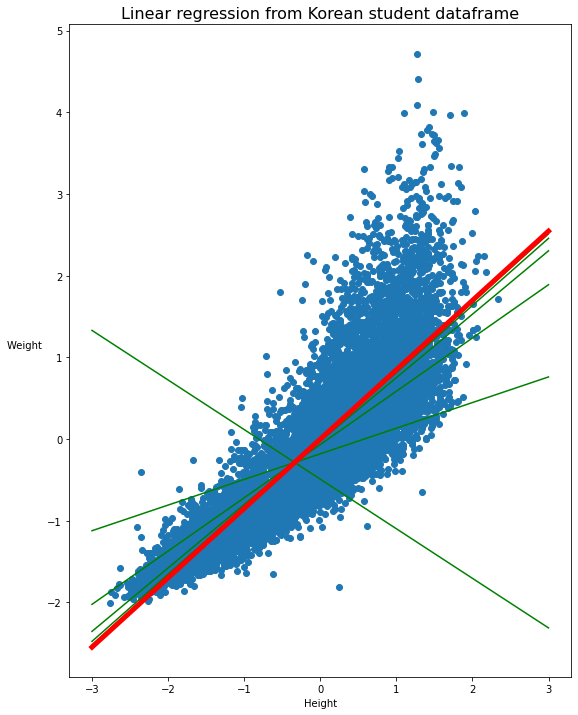

In [33]:
x_plot = torch.linspace(-3, 3, 10, dtype=torch.double).unsqueeze(1)
plt.figure(figsize=(9,12))
for w, b in zip(w_plot, b_plot):
  y_plot = (torch.mm(x_plot, w) + b).detach()
  if w == w_plot[-1]:
    plt.plot(x_plot, y_plot, c='red', linewidth=5)
  else:
    plt.plot(x_plot, y_plot, c='green')

plt.scatter(x_train_normal, y_train_normal)
plt.title("Linear regression from Korean student dataframe", fontsize=16)
plt.xlabel("Height")
plt.ylabel("Weight            ", rotation=0)
plt.show()

- 그러나 위의 그래프는 학습 데이터를 정규화한 후 학습시킨 모델을 그린 것이기 때문에 평균 0, 표준편차 1을 따르므로 실제 키와 몸무게 데이터와 비교하기가 힘들다.
- 따라서 아래의 코드는 기존의 데이터와 비교하기 위해 w와 b 값을 기존의 데이터에 맞도록 변환한 후 그래프를 그린 결과이다.
- 아래의 식은 w와 b를 변환하기 위해 사용한 식이다.
 > 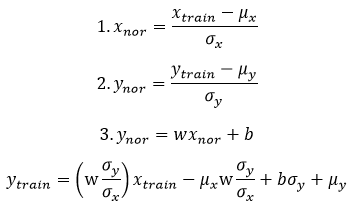

- 1번 식과 2번 식을 3번 식에 대입하고 y_train과 x_train에 대해 정리하면 위와 같은 식이 되므로 여기서 변환된 w와 b 값은 아래와 같다.
> 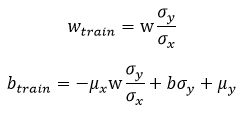

- w와 b를 변환한 후에 그래프를 그리면 아래와 같고, 그래프를 통해 학습을 통해 구한 선형회귀 모델이 기존의 데이터 또한 잘 설명한다는 것을 알 수 있다.

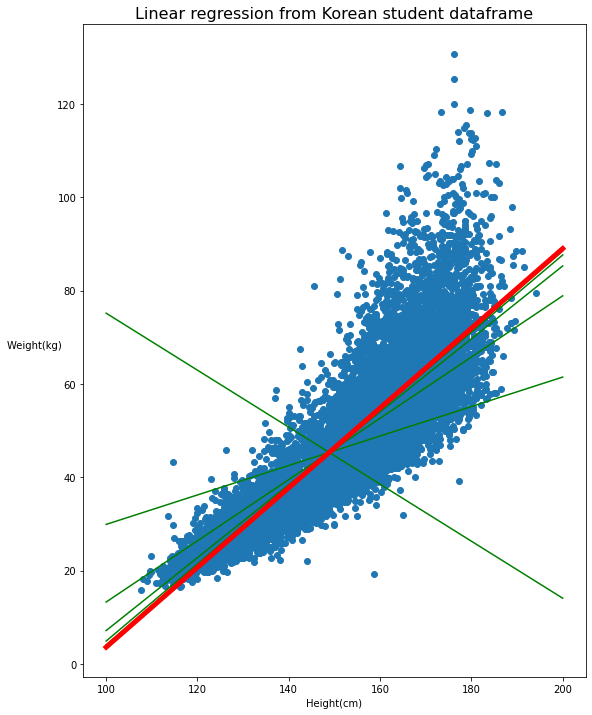

In [34]:
w_plot_tensor = torch.tensor(w_plot).reshape(-1, 1)
b_plot_tensor = torch.tensor(b_plot).reshape(-1, 1)

w_plot_train = w_plot_tensor * y_train_std / x_train_std
b_plot_train = - x_train.mean() * w_plot_tensor * y_train_std / x_train_std + b_plot_tensor * y_train_std + y_train.mean()

x_plot = torch.linspace(100, 200, 10, dtype=torch.double).unsqueeze(1)
plt.figure(figsize=(9,12))
for w_train, b_train in zip(w_plot_train, b_plot_train):
  y_plot = (torch.mm(x_plot, w_train.reshape(-1, 1)) + b_train).detach()
  if w_train == w_plot_train[-1]:
    plt.plot(x_plot, y_plot, c='red', linewidth=5)
  else:
    plt.plot(x_plot, y_plot, c='green')

plt.scatter(x_train, y_train)
plt.title("Linear regression from Korean student dataframe", fontsize=16)
plt.xlabel("Height(cm)")
plt.ylabel("Weight(kg)            ", rotation=0)
plt.show()